# Data Analysis II

1. Implement logistic regression using Python /R to perform classification on Social_Network_Ads.csv dataset.
   
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,Recall on the given dataset.
   

### 1. Importing all the required Python Libraries.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the Dataset into pandas’ data frame.

In [86]:
df=pd.read_csv('Social_Network_Ads.csv')

#### 2.1 Dimesnions of Dataset

In [87]:
df.shape

(400, 5)

#### 2.2 Variable Description and their type

In [88]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [89]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### 3.Description

In [90]:
df.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


Important Observations :

1. there are 4 integer columns and 1 categorical (Gender)
2. Average age of person likely to purchase a product is 37 years
   and min age is 18 wile max is 60
3. Purchased is the TARGET variable to predict 0 = Not Purchased, 1 = Purchased
4. User ID used to uniquely identify , not influential in predicting Purchase


### 4.Visualization

#### 4.1 Purchase Count


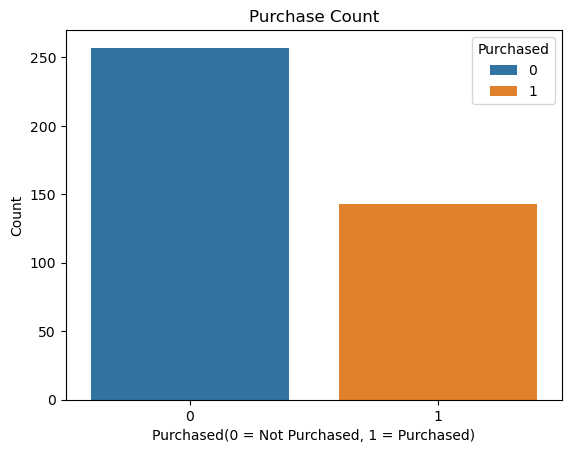

Purchased
0    257
1    143
Name: count, dtype: int64

In [91]:
sns.countplot(x="Purchased",hue="Purchased",data=df)
plt.xlabel("Purchased(0 = Not Purchased, 1 = Purchased)")
plt.ylabel("Count")
plt.title("Purchase Count")
plt.show()

df["Purchased"].value_counts()

Observation:

Most people didnt purchase (257) than those who did (143)

#### 4.2 Gender wise Purchase Count

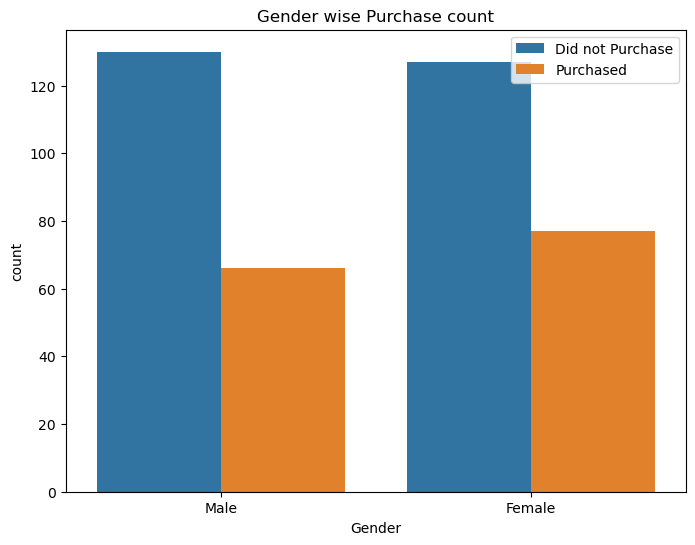

In [92]:
plt.figure(figsize=(8,6))
sns.countplot(x="Gender",hue="Purchased",data=df)
plt.title("Gender wise Purchase count")
plt.legend(["Did not Purchase", "Purchased"])

Observations :

1.The majority of users did not purchase (blue bars are taller) and gender wise men didnt purchase

2.The number of purchases (orange bars) is slightly higher for Females than Males.

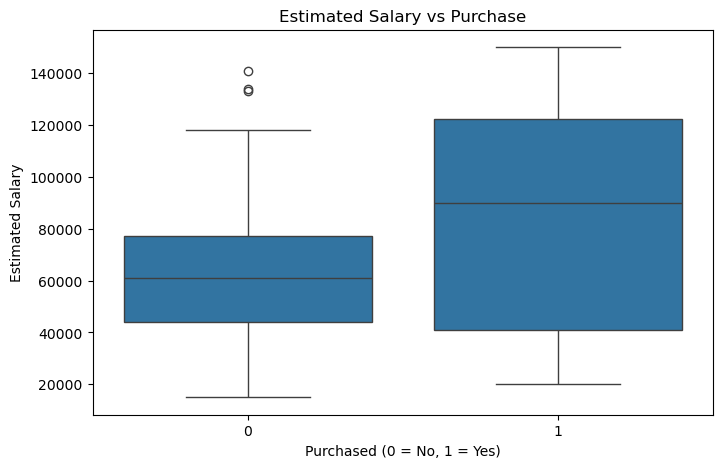

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Purchased"], y=df["EstimatedSalary"])
plt.title("Estimated Salary vs Purchase")
plt.xlabel("Purchased (0 = No, 1 = Yes)")
plt.ylabel("Estimated Salary")
plt.show()

## 5.Preparing Data for Model

### 5.1 Dropping User ID Column as it does not affect or influence the prediction in any way

In [94]:
df.drop(columns=["User ID"],inplace=True)

### 5.2 Converting Categorical Data to numerical one 

In [95]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df.head(3)


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0


In [96]:
print(label_encoder.classes_)  

['Female' 'Male']


Female → 0

Male → 1

The assignment of numbers (0 for Female and 1 for Male) depends on the internal working 

of LabelEncoder. By default, LabelEncoder assigns labels in alphabetical order.

### 5.3 Scaling Numerical features

In [97]:

from sklearn.preprocessing import StandardScaler

numeric_features=['Age','EstimatedSalary']
scaler= StandardScaler()

df[numeric_features]=scaler.fit_transform(df[numeric_features])
df['age_salary_relation']=df['Age']*df['EstimatedSalary']
df['age_salary_relation']=scaler.fit_transform(df[['age_salary_relation']])


### 6.Creating Logistic Regression Model

In [98]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,age_salary_relation
0,1,-1.781797,-1.490046,0,2.392085
1,1,-0.253587,-1.460681,0,0.205907
2,0,-1.113206,-0.785290,0,0.687993
3,0,-1.017692,-0.374182,0,0.215851
4,1,-1.781797,0.183751,0,-0.461862


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score


X = df.drop(columns=['Purchased']) 
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42)


In [100]:

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [101]:
y_pred = model.predict(X_test)

In [102]:
acc=accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9224137931034483


In [103]:
cm=confusion_matrix(y_test,y_pred)
print('CONFUSION MATRIX:')
print(cm)


CONFUSION MATRIX:
[[66  4]
 [ 5 41]]


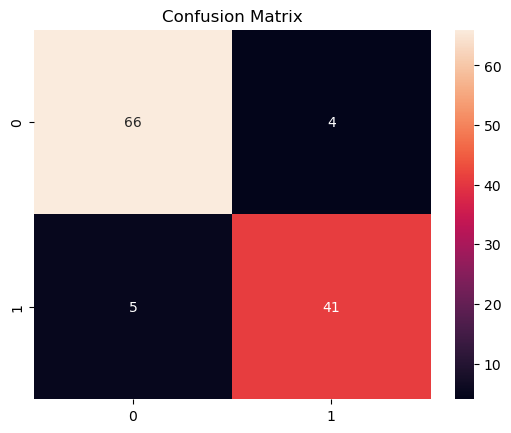

In [104]:

sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.show()

True Negative (TN) = 66  The model correctly predicted 69 cases as 0.

False Positive (FP) = 4  The model incorrectly predicted 4 cases as 1 instead of 0.

False Negative (FN) = 5  The model incorrectly predicted 6 cases as 0 instead of 1.

True Positive (TP) = 41  The model correctly predicted 41 cases as 1.

In [105]:
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))


print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


True Negatives (TN): 66
False Positives (FP): 4
False Negatives (FN): 5
True Positives (TP): 41


Accuracy (ACC)  Measures overall correctness:
Accuracy= TP+TN/
        FP+FN+TP+TN

In [106]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.9224137931034483


In [107]:
error_rate=1-accuracy
error_rate

0.07758620689655171

Recall (True Positive Rate, TPR)  Measures how well the model detects positives

In [108]:
recall=(TP)/(TP+FN)
recall

0.8913043478260869

Precision (Measures how many predicted positives were actually correct):


In [109]:
prec=(TP)/(TP+FP)
prec

0.9111111111111111

In [110]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        70
           1       0.91      0.89      0.90        46

    accuracy                           0.92       116
   macro avg       0.92      0.92      0.92       116
weighted avg       0.92      0.92      0.92       116



In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.9224137931034483
Precision: 0.9111111111111111
Recall: 0.8913043478260869
